# Projeto Covid-19

## Projeto de ánalise exploratória dos dados sobre Covid-19

In [117]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

# Importando os dados necessários para o projeto

In [118]:
url = "https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true"

In [119]:
data=pd.read_csv(url,parse_dates=['ObservationDate','Last Update'])

In [122]:
data.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [66]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     13831
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [123]:
import re
def corrigir_colunas(col_name):
    return re.sub(r"[/| ]", "" , col_name).lower()

In [124]:
data.columns = [corrigir_colunas(col) for col in data.columns]

# Brasil

## Agora iremos selecionar os estados somente no país que iremos trabalhar, neste caso os estados do Brasil

In [125]:
brasil = data.loc[
    (data.countryregion== 'Brazil')&
    (data.confirmed > 0)
                 ]

In [126]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Casos confirmados no Brasil

In [127]:
px.line(brasil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')


In [128]:
brasil['novoscasos'] = list(map(
    lambda x:0 if(x<=0)else brasil['confirmed'].iloc[x]-brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

C:\Users\L\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [130]:
px.line(brasil, x='observationdate', y='novoscasos', title='novos casos por dia')


# Mortes

In [131]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths,name='Mortes',
              mode='lines+markers',line={'color':'purple'})
)

fig.update_layout(title='Mortes por Covid-19 no Brasil')

fig.show()

# Taxa de Crescimento

taxa_crescimento = (presente/passado)**(1/n) - 1

In [132]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable]>0].min()
    else:data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else: data_fim =pd.to_datetime(data_fim)
        
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    n = (data_fim - data_inicio).days
    
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100

In [133]:
taxa_crescimento(brasil,'confirmed')

16.27183353112116

In [134]:
def taxa_crescimento_diario(data, variable, data_inicio=None):
        if data_inicio == None:
            data_inicio = data.observationdate.loc[data[variable]>0].min()
        else:
            data_inicio = pd.to_datetime(data_inicio)
            
        data_fim = data.observationdate.max()
        
        n = (data_fim-data_inicio).days
        
        taxas = list(map(
            lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1])/data[variable].iloc[x-1],
            range(1,n+1)
        ))
        return np.array(taxas) * 100
    

In [135]:
tx_dia = taxa_crescimento_diario(brasil, 'confirmed')

In [136]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [137]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed>0].min()

px.line(x=pd.date_range(primeiro_dia,brasil.observationdate.max())[1:],
       y=tx_dia, title = 'Taxa de crescimento de casos confirmados')

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [139]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [140]:
res = seasonal_decompose(confirmados)

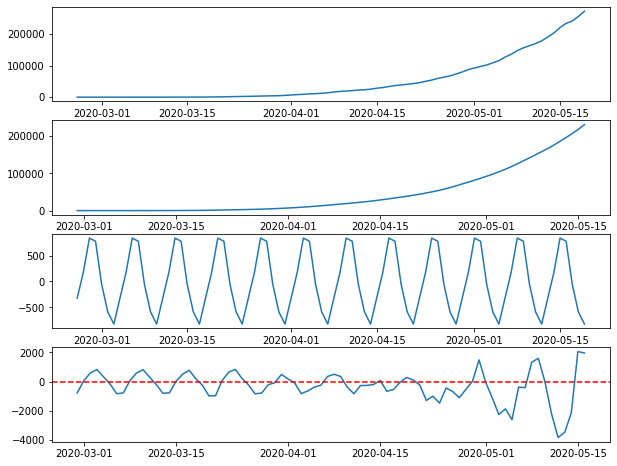

In [141]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='red')
plt.show()

In [142]:
from pmdarima.arima import auto_arima

In [143]:
modelo = auto_arima(confirmados)

In [147]:
fig = go.Figure(go.Scatter(
    x = confirmados.index, y = confirmados, name = 'Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y = confirmados, name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20','2020-06-20'), y=modelo.predict(31), name = 'Forecast'
))

fig.update_layout(title = 'Previsão de casos confirmados para o proximo mês')
fig.show()
